# Radiative Cores & Convective Envelopes

Analysis of how magnetic fields influence the extent of radiative cores and convective envelopes in young, pre-main-sequence stars.

Begin with some preliminaries.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

Load a standard and magnetic isochrone with equivalent ages. Here, the adopted age is 10 Myr to look specifically at the predicted internal structure of stars in Upper Scorpius.

In [2]:
# read standard 10 Myr isochrone
iso_std = np.genfromtxt('../models/iso/std/dmestar_00010.0myr_z+0.00_a+0.00_phx.iso')

# read standard 5 Myr isochrone
iso_5my = np.genfromtxt('../models/iso/std/dmestar_00005.0myr_z+0.00_a+0.00_phx.iso')

# read magnetic isochrone
iso_mag = np.genfromtxt('../models/iso/mag/dmestar_00010.0myr_z+0.00_a+0.00_phx_magBeq.iso')

The magnetic isochrone is known to begin at a lower mass than the standard isochrone and both isochrones have gaps where individual models failed to converge. Gaps need not occur at the same masses along each isochrone. To overcome these inconsistencies, we can interpolate both isochrones onto a pre-defined mass domain.

In [3]:
masses = np.arange(0.09, 1.70, 0.01)  # new mass domain

# create an interpolation curve for a standard isochrone 
icurve = interp1d(iso_std[:,0], iso_std, axis=0, kind='cubic')

# and transform to new mass domain
iso_std_eq = icurve(masses)

# create interpolation curve for standard 5 Myr isochrone
icurve = interp1d(iso_5my[:,0], iso_5my, axis=0, kind='linear')

# and transform to a new mass domain
iso_5my_eq = icurve(masses)

# create an interpolation curve for a magnetic isochrone 
icurve = interp1d(iso_mag[:,0], iso_mag, axis=0, kind='cubic')

# and transform to new mass domain
iso_mag_eq = icurve(masses)

Let's compare the interpolated isochrones to the original, just to be sure that the resulting isochrones are smooth.

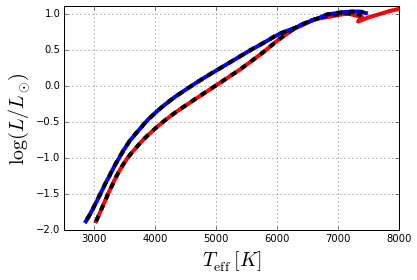

In [4]:
plt.plot(10**iso_std[:, 1], iso_std[:, 3], '-', lw=4, color='red')
plt.plot(10**iso_std_eq[:, 1], iso_std_eq[:, 3], '--', lw=4, color='black')

plt.plot(10**iso_mag[:, 1], iso_mag[:, 3], '-', lw=4, color='blue')
plt.plot(10**iso_mag_eq[:, 1], iso_mag_eq[:, 3], '--', lw=4, color='black')

plt.grid()
plt.xlim(2500., 8000.)
plt.ylim(-2, 1.1)
plt.xlabel('$T_{\\rm eff}\ [K]$', fontsize=20)
plt.ylabel('$\\log(L / L_{\\odot})$', fontsize=20)

The interpolation appears to have worked well as there are no egregious discrepancies between the real and interpolated isochrones.

We can now analyze the properties of the radiative cores and the convective envelopes. Beginning with the radiative core, we can look as a function of stellar properties, how much of the total stellar mass is contained in the radiative core.

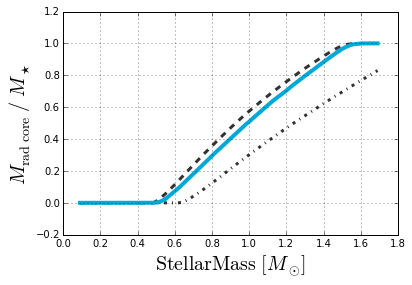

In [5]:
# as a function of stellar mass
plt.plot(iso_std_eq[:, 0], 1.0 - iso_std_eq[:, -1]/iso_std_eq[:, 0], 
         '--', lw=3, color='#333333')
plt.plot(iso_5my_eq[:, 0], 1.0 - iso_5my_eq[:, -1]/iso_5my_eq[:, 0], 
         '-.', lw=3, color='#333333')
plt.plot(iso_mag_eq[:, 0], 1.0 - iso_mag_eq[:, -1]/iso_mag_eq[:, 0], 
         '-' , lw=4, color='#01a9db')

plt.grid()
plt.xlabel('${\\rm Stellar Mass}\ [M_{\\odot}]$', fontsize=20)
plt.ylabel('$M_{\\rm rad\ core}\ /\ M_{\\star}$', fontsize=20)

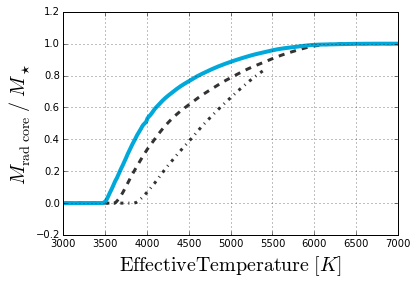

In [6]:
# as a function of effective temperature
plt.plot(10**iso_std_eq[:, 1], 1.0 - iso_std_eq[:, -1]/iso_std_eq[:, 0], 
         '--', lw=3, color='#333333')
plt.plot(10**iso_5my_eq[:, 1], 1.0 - iso_5my_eq[:, -1]/iso_5my_eq[:, 0], 
         '-.', lw=3, color='#333333')
plt.plot(10**iso_mag_eq[:, 1], 1.0 - iso_mag_eq[:, -1]/iso_mag_eq[:, 0], 
         '-' , lw=4, color='#01a9db')

plt.grid()
plt.xlim(3000., 7000.)
plt.xlabel('${\\rm Effective Temperature}\ [K]$', fontsize=20)
plt.ylabel('$M_{\\rm rad\ core}\ /\ M_{\\star}$', fontsize=20)

Now let's look at the relative difference in radiative core mass as a function of these stellar properties.

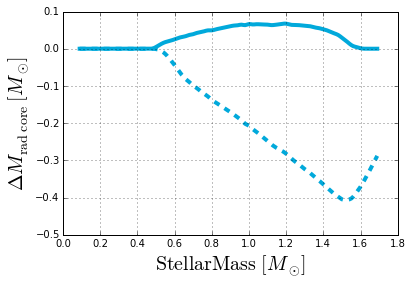

In [7]:
# as a function of stellar mass (note, there is a minus sign switch b/c we tabulate 
# convective envelope mass)
plt.plot(iso_mag_eq[:, 0], (iso_mag_eq[:, -1] - iso_std_eq[:, -1]), 
         '-' , lw=4, color='#01a9db')
plt.plot(iso_mag_eq[:, 0], (iso_mag_eq[:, -1] - iso_5my_eq[:, -1]), 
         '--' , lw=4, color='#01a9db')

plt.grid()
plt.xlabel('${\\rm Stellar Mass}\ [M_{\\odot}]$', fontsize=20)
plt.ylabel('$\\Delta M_{\\rm rad\ core}\ [M_{\\odot}]$', fontsize=20)

Analysis

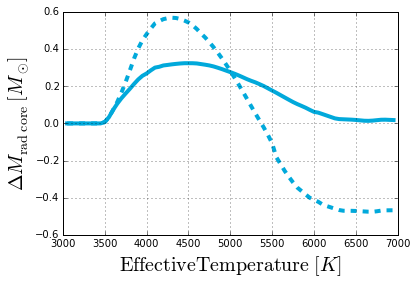

In [10]:
# interpolate into the temperature domain
Teffs  = np.log10(np.arange(3050., 7000., 50.))

icurve = interp1d(iso_std[:, 1], iso_std, axis=0, kind='linear')
iso_std_te = icurve(Teffs)

icurve = interp1d(iso_5my[:, 1], iso_5my, axis=0, kind='linear')
iso_5my_te = icurve(Teffs)

icurve = interp1d(iso_mag[:, 1], iso_mag, axis=0, kind='linear')
iso_mag_te = icurve(Teffs)

# as a function of stellar mass 
# (note, there is a minus sign switch b/c we tabulate convective envelope mass)
#
# plotting: standard - magnetic where + implies 
plt.plot(10**Teffs, (iso_mag_te[:, 0] - iso_mag_te[:, -1] - 
                     iso_std_te[:, 0] + iso_std_te[:, -1]), 
         '-' , lw=4, color='#01a9db')
plt.plot(10**Teffs, (iso_mag_te[:, 0] - iso_mag_te[:, -1] - 
                     iso_5my_te[:, 0] + iso_5my_te[:, -1]), 
         '--' , lw=4, color='#01a9db')

np.savetxt('../models/rad_core_comp.txt', 
           np.column_stack((iso_std_te, iso_mag_te)), 
           fmt="%10.6f")

np.savetxt('../models/rad_core_comp_dage.txt', 
           np.column_stack((iso_5my_te, iso_mag_te)), 
           fmt="%10.6f")

plt.grid()
plt.xlim(3000., 7000.)
plt.xlabel('${\\rm Effective Temperature}\ [K]$', fontsize=20)
plt.ylabel('$\\Delta M_{\\rm rad\ core}\ [M_{\\odot}]$', fontsize=20)

Stars are fully convective below 3500 K, regardless of whether there is magnetic inhibition of convection. On the other extreme, stars hotter than about 6500 K are approaching ignition of the CN-cycle, which coincides with the disappearnce of the outer convective envelope. However, delayed contraction means that stars of a given effective temperature have a higher mass in the magnetic case, which leads to a slight mass offset once the radiative core comprises nearly 100% of the star. Note that our use of the term "radiative core" is technically invalid in this regime due to the presence of a convective core. 